# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define base URL
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

# List to store reviews and ratings
reviews_data = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Find all review containers
    review_containers = parsed_content.find_all("article", {"itemprop": "review"})

    for review in review_containers:
        # Extract review text
        review_text = review.find("div", {"class": "text_content"})
        review_text = review_text.get_text(strip=True) if review_text else "No Review Text"

        # Extract review rating
        rating_element = review.find("span", {"itemprop": "ratingValue"})
        rating = rating_element.get_text(strip=True) if rating_element else "No Rating"

        # Store in list as dictionary
        reviews_data.append({"Review": review_text, "Rating": rating})
    
    print(f"   ---> {len(reviews_data)} total reviews scraped")

# Convert to DataFrame
df = pd.DataFrame(reviews_data)

# Save to CSV
df.to_csv("british_airways_reviews.csv", index=False)

print("Scraping complete. Data saved to british_airways_reviews.csv")


Scraping page 1
   ---> 100 total reviews scraped
Scraping page 2
   ---> 200 total reviews scraped
Scraping page 3
   ---> 300 total reviews scraped
Scraping page 4
   ---> 400 total reviews scraped
Scraping page 5
   ---> 500 total reviews scraped
Scraping page 6
   ---> 600 total reviews scraped
Scraping page 7
   ---> 700 total reviews scraped
Scraping page 8
   ---> 800 total reviews scraped
Scraping page 9
   ---> 900 total reviews scraped
Scraping page 10
   ---> 1000 total reviews scraped
Scraping complete. Data saved to british_airways_reviews.csv


In [3]:
df.head()

,Review,Rating
0,✅Trip Verified| Prior to boarding a gate age...,3
1,✅Trip Verified| I flew from Amsterdam to Las...,1
2,"✅Trip Verified| First the good news, the club ...",4
3,✅Trip Verified| I have never travelled with ...,9
4,"✅Trip Verified| Terrible overall, medium servi...",1


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df["Review"] = df["Review"].str.replace("Trip Verified", "", regex=False)
df["Review"] = df["Review"].str.replace("Not Verified", "", regex=False)
df["Review"] = df["Review"].str.replace("|", "", regex=False)
df["Review"] = df["Review"].str.replace("✅", "", regex=False)
df["Review"] = df["Review"].str.strip()  # Remove any extra spaces left behind


df.head()

,Review,Rating
0,Prior to boarding a gate agent seemed to pick ...,3
1,I flew from Amsterdam to Las Vegas with a layo...,1
2,"First the good news, the club suites are such ...",4
3,I have never travelled with British airways be...,9
4,"Terrible overall, medium service and the fligh...",1


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")

# Preprocess text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    words = text.split()
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return " ".join(words)

df["Cleaned_Review"] = df["Review"].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df["Cleaned_Review"].head()

0    prior boarding gate agent seemed pick elderly ...
1    flew amsterdam la vega layover heathrow novemb...
2    first good news club suite huge improvement ol...
3    never travelled british airway first time chos...
4    terrible overall medium service flight delayed...
Name: Cleaned_Review, dtype: object

In [15]:
from collections import Counter
word_counts = Counter(" ".join(df['Cleaned_Review']).split())
print(word_counts.most_common(10))

[('flight', 2288), ('ba', 1400), ('seat', 824), ('service', 781), ('time', 668), ('hour', 618), ('airline', 483), ('london', 463), ('crew', 463), ('british', 453)]


In [45]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   ------- -------------------------------- 112.6/624.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  614.4/624.3 kB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 5.6 MB/s eta 0:00:00


In [17]:
from textblob import TextBlob

df["Sentiment"] = df["Cleaned_Review"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Sentiment_Label"] = df["Sentiment"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))
df["Sentiment_Label"].value_counts()

Sentiment_Label
Positive    619
Negative    364
Neutral      17
Name: count, dtype: int64

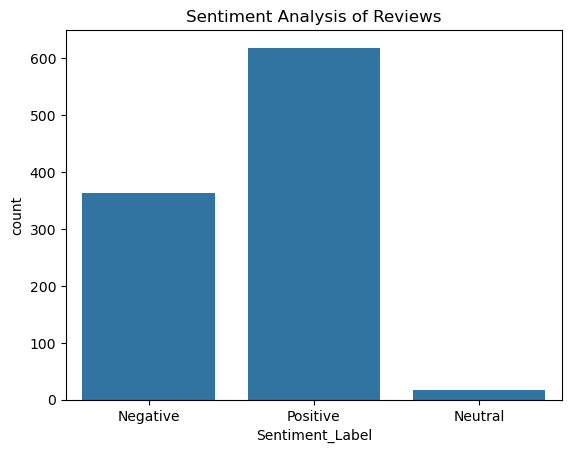

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df["Sentiment_Label"])
plt.title("Sentiment Analysis of Reviews")
plt.show()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(df["Cleaned_Review"])

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

# Show top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}: " + ", ".join([words[j] for j in topic.argsort()[-10:]]))

Topic 1: showing, going, offered, air, compared, white, idea, bother, canada, mother
Topic 2: moment, hadnt, virgin, mask, treated, stood, youre, avios, shuttle, showing
Topic 3: service, good, cabin, economy, food, business, class, ba, flight, seat
Topic 4: time, lounge, great, drink, cabin, excellent, food, flight, crew, good
Topic 5: told, service, day, airway, british, cancelled, customer, hour, ba, flight


In [25]:
df = df.drop(columns=["Review"])

df.head()

,Rating,Cleaned_Review,Sentiment,Sentiment_Label
0,3,prior boarding gate agent seemed pick elderly ...,-0.099048,Negative
1,1,flew amsterdam la vega layover heathrow novemb...,0.038658,Positive
2,4,first good news club suite huge improvement ol...,0.167778,Positive
3,9,never travelled british airway first time chos...,0.352778,Positive
4,1,terrible overall medium service flight delayed...,-0.666667,Negative


C:\Users\johnn\AppData\Local\Temp\ipykernel_29500\3274893337.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Blues")


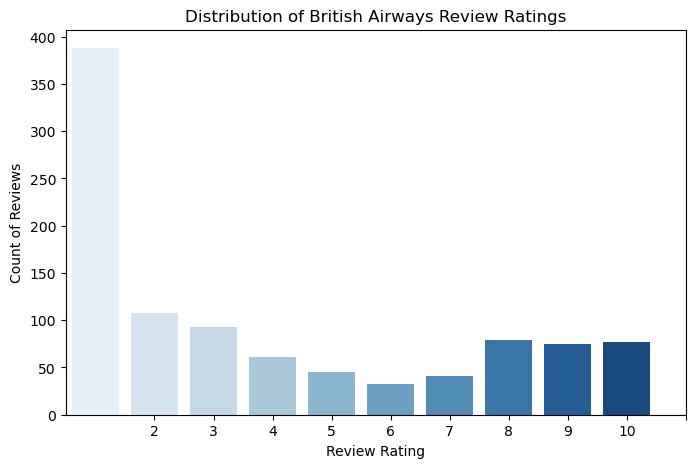

In [31]:
# Convert 'Rating' column to numeric (in case it's stored as a string)
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Count occurrences of each rating
rating_counts = df["Rating"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Blues")

plt.xlabel("Review Rating")
plt.ylabel("Count of Reviews")
plt.title("Distribution of British Airways Review Ratings")
plt.xticks(rating_counts.index)
plt.show()

In [51]:
df['Rating'].value_counts()

Rating
1     388
2     108
3      93
8      79
10     77
9      75
4      61
5      45
7      41
6      33
Name: count, dtype: int64

In [47]:
df['Sentiment_Label'].value_counts()

Sentiment_Label
Positive    619
Negative    364
Neutral      17
Name: count, dtype: int64

# Task 2
## Machine Learning

In [60]:
# loading machine learning dataset as customer_booking
customer_booking = pd.read_csv('customer_booking.csv', encoding='latin1')

In [62]:
customer_booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [70]:
# checking for null values
print(customer_booking.isnull().sum())

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [82]:
# convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["sales_channel", "trip_type", "route", "booking_origin", "flight_day"]
encoder = LabelEncoder()

for col in categorical_cols:
    customer_booking[col] = encoder.fit_transform(customer_booking[col])


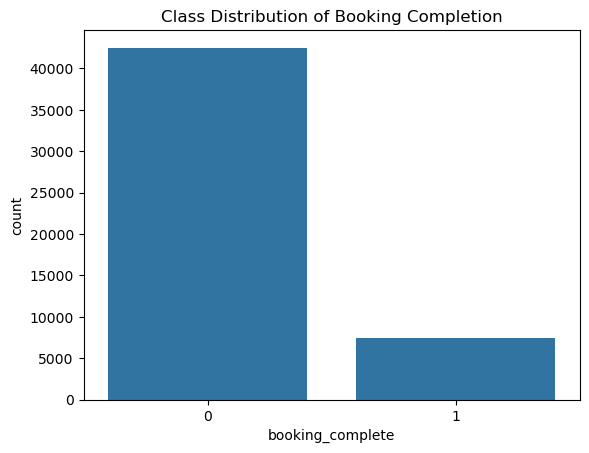

booking_complete
0    42522
1     7478
Name: count, dtype: int64


In [98]:
# checking class distribution

sns.countplot(x=customer_booking["booking_complete"])
plt.title("Class Distribution of Booking Completion")
plt.show()
print(customer_booking['booking_complete'].value_counts())

In [88]:
# Define features (X) and target (y)
X = customer_booking.drop(columns=["booking_complete"])  # All features except target
y = customer_booking["booking_complete"]  # Target variable


In [90]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split into training & test sets BEFORE applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE on training data ONLY (not test data)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution after SMOTE
print("Class distribution after SMOTE:\n", y_train_smote.value_counts())


Class distribution after SMOTE:
 booking_complete
0    34018
1    34018
Name: count, dtype: int64


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = rf_model.predict(X_test)


Model Accuracy: 0.8055
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      8504
           1       0.36      0.38      0.37      1496

    accuracy                           0.81     10000
   macro avg       0.62      0.63      0.63     10000
weighted avg       0.81      0.81      0.81     10000



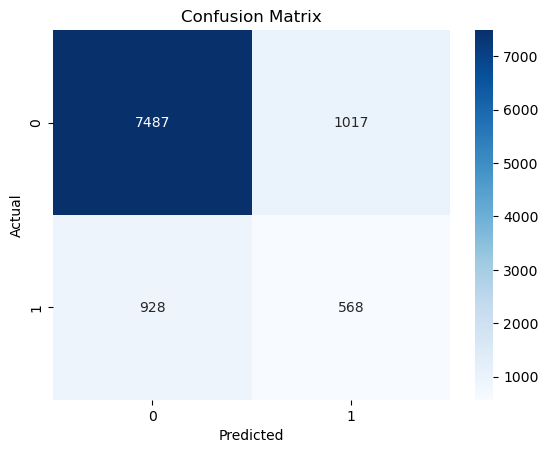

In [94]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


C:\Users\johnn\AppData\Local\Temp\ipykernel_29500\2988095911.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")


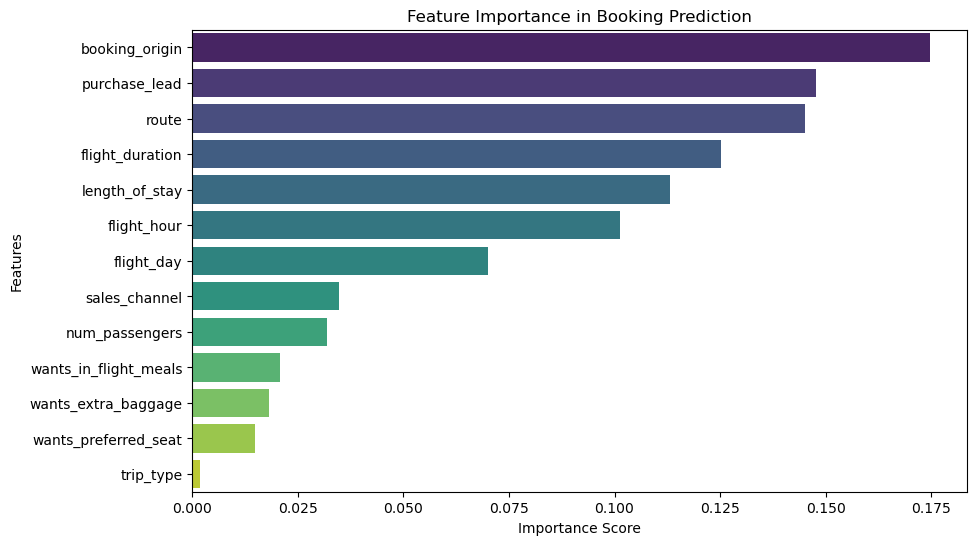

In [96]:
# Extract feature importances
importances = rf_model.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Booking Prediction")
plt.show()


In [100]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf
    'bootstrap': [True, False]  # Whether to sample data with replacement
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Tuned Model Accuracy: 0.8104
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      8504
           1       0.36      0.34      0.35      1496

    accuracy                           0.81     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.81      0.81      0.81     10000



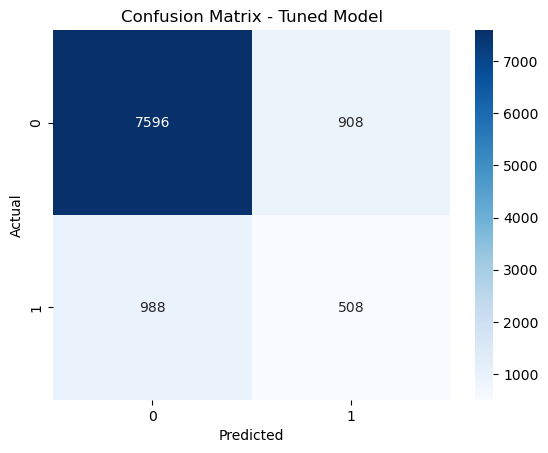

In [101]:
y_pred_tuned = best_rf.predict(X_test)

# Accuracy
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Model")
plt.show()
